In [ ]:
# Источник и описание полей датасета: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [ ]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import requests, zipfile, io  # работает с архивами
import matplotlib.pyplot as plt  # работает с графиками и диаграммами
import seaborn as sns  # работает с графиками и диаграммами

In [ ]:
# Указываем ссылку на архив с датасетом и создаем соотвествующий объект
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))

In [ ]:
# Просматриваем архив и выбираем нужный файл
z.namelist()

['bank-full.csv', 'bank-names.txt', 'bank.csv']

In [ ]:
# Считываем датасет
df = pd.read_csv(z.open('bank-full.csv'), sep=';')
df.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41036,74,retired,married,tertiary,no,6027,no,no,cellular,14,aug,233,2,-1,0,unknown,no
12016,50,entrepreneur,married,primary,yes,537,yes,no,unknown,20,jun,11,15,-1,0,unknown,no
19246,40,management,married,tertiary,no,3812,no,no,cellular,6,aug,58,4,-1,0,unknown,no
32319,45,management,divorced,secondary,no,1144,yes,no,cellular,16,apr,129,1,-1,0,unknown,no
10476,36,entrepreneur,single,tertiary,no,658,yes,no,unknown,16,jun,61,3,-1,0,unknown,no
30551,42,technician,married,unknown,no,906,yes,no,cellular,5,feb,434,2,-1,0,unknown,no
6161,39,services,single,secondary,no,326,yes,no,unknown,27,may,115,1,-1,0,unknown,no
16431,50,technician,married,secondary,no,1130,yes,no,cellular,23,jul,119,2,-1,0,unknown,no
32356,45,housemaid,married,primary,no,3512,no,no,cellular,16,apr,96,1,-1,0,unknown,no
15346,29,services,single,secondary,yes,-308,no,no,cellular,18,jul,113,1,-1,0,unknown,no


# Библиотека Matplotlib

In [ ]:
# Выбор стиля оформления диаграмм
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
df['month']

0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: month, Length: 45211, dtype: object

In [ ]:
# Меняем тип переменной

df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
df['month']

0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int64

In [ ]:
# Готовим данные для графика в виде сводной таблицы

data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head()

,month,count
0,1,1403
1,2,2649
2,3,477
3,4,2932
4,5,13766


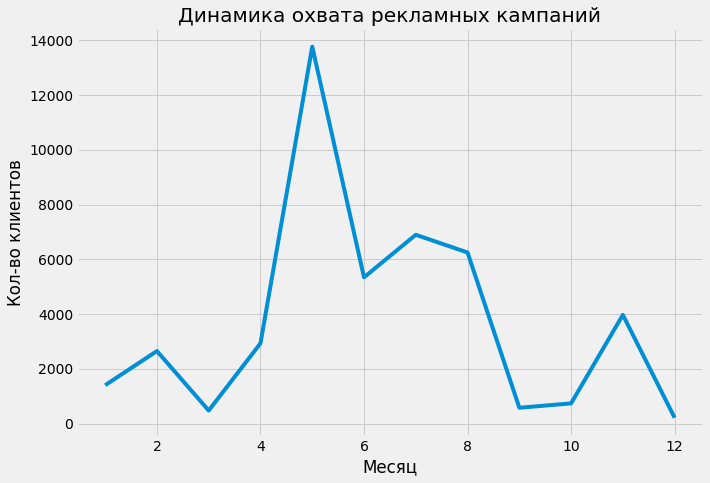

In [ ]:
# Создаем линейный график

plt.figure(figsize=(10, 7))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')

plt.show()

In [ ]:
# Фильтруем и готовим данные по семейному положению

data1 = df[df['marital'] == 'single'].groupby('month')['job'] \
             .agg(count='count').reset_index().sort_values(by='month')

data2 = df[df['marital'] == 'married'].groupby('month')['job'] \
             .agg(count='count').reset_index().sort_values(by='month')
             
data1.head()

,month,count
0,1,537
1,2,926
2,3,183
3,4,918
4,5,4213


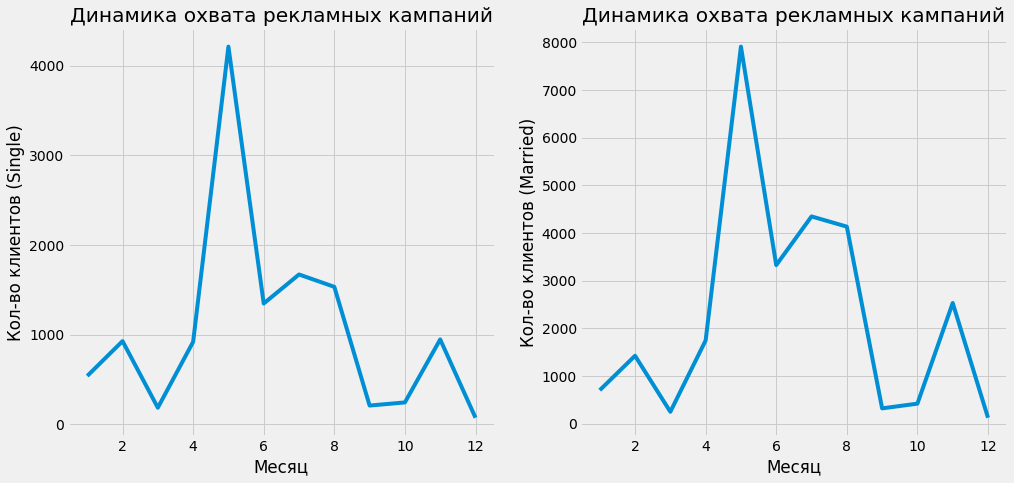

In [ ]:
# Строим два линейных графика с отфильтрованными данными

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].plot(data1['month'], data1['count'])
ax[0].set_title('Динамика охвата рекламных кампаний')
ax[0].set_xlabel('Месяц')
ax[0].set_ylabel('Кол-во клиентов (Single)')

ax[1].plot(data2['month'], data2['count'])
ax[1].set_title('Динамика охвата рекламных кампаний')
ax[1].set_xlabel('Месяц')
ax[1].set_ylabel('Кол-во клиентов (Married)')

plt.show()

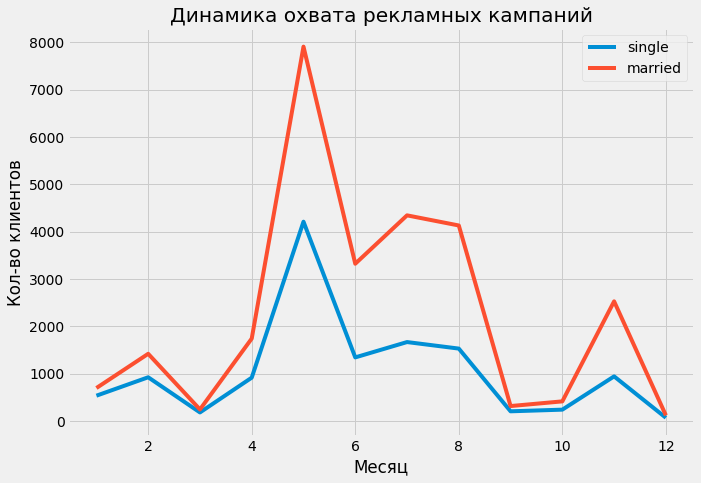

In [ ]:
# Строим линейный график с отфильтрованными данными

plt.figure(figsize=(10, 7))

plt.plot(data1['month'], data1['count'])
plt.plot(data2['month'], data2['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend(['single', 'married'])

plt.show()

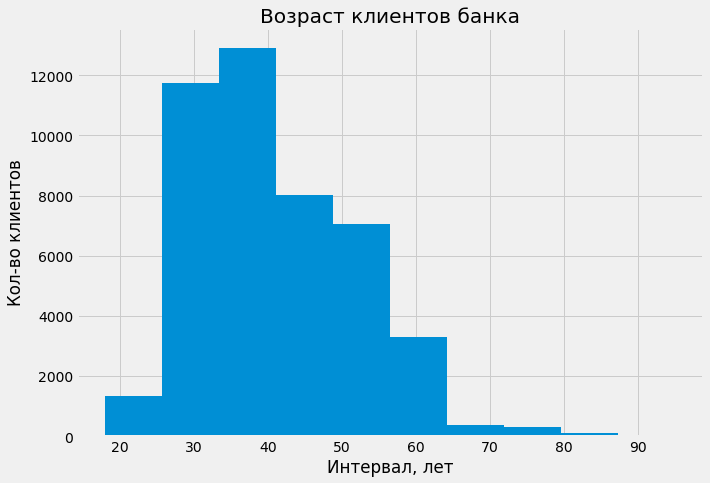

In [ ]:
# Строим гистограмму в разрезе возраста

plt.figure(figsize=(10, 7))

plt.hist(df['age'], bins=10)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

plt.show()

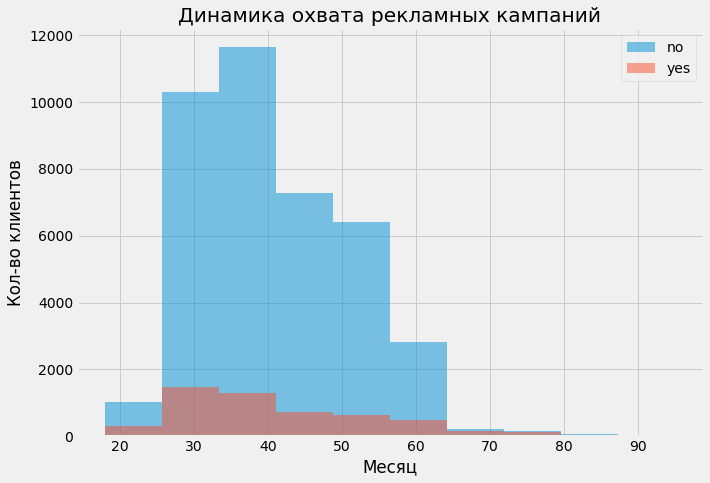

In [ ]:
# Строим гистограмму в разрезе людей, ставших и не ставших клиентами депозита

plt.figure(figsize=(10, 7))

plt.hist(df['age'][df['y'] == 'no'], alpha=0.5, label='no')
plt.hist(df['age'][df['y'] == 'yes'], alpha=0.5, label='yes')


plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend()

plt.show()

In [ ]:
# Перекодируем переменную y
df['convert'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


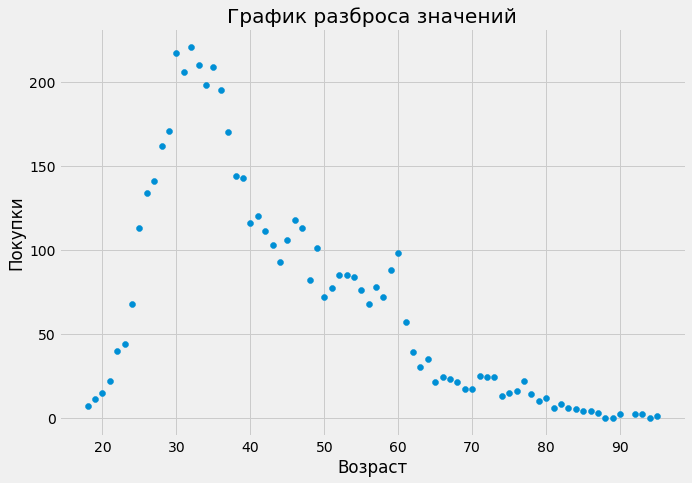

In [ ]:
# Строим диаграмму рассеяния

plt.figure(figsize=(10, 7))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки')

plt.show()

In [ ]:
# Готовим данные для графика
data1 = df['duration'][df['y'] == 'yes']
data2 = df['duration'][df['y'] == 'no']
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


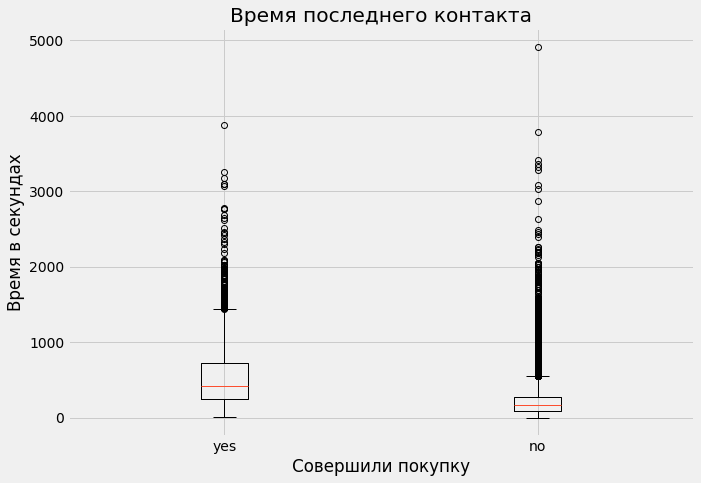

In [ ]:
# Строим боксплот

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no'])

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


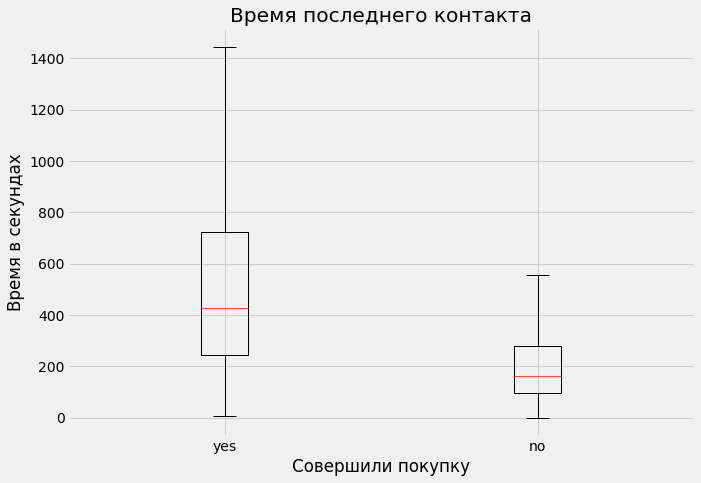

In [ ]:
# Строим боксплот без выбросов 

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no'])

plt.show()

In [ ]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


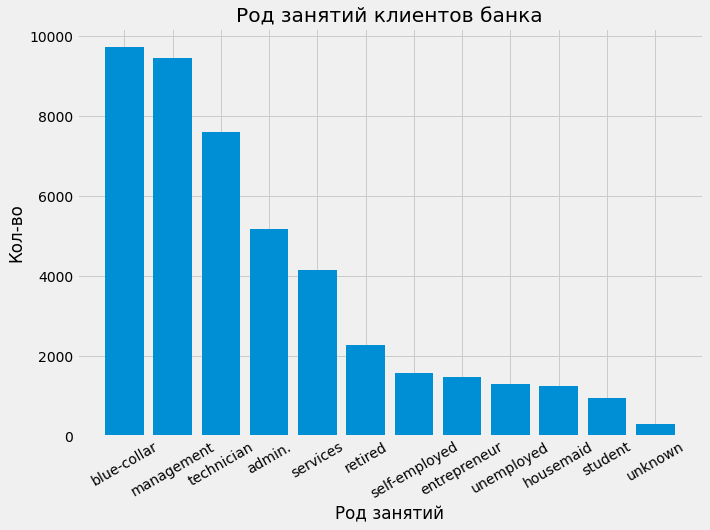

In [ ]:
# Строим столбчатую диаграмму

plt.figure(figsize=(10, 7))

plt.bar(data['index'], data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30)

plt.show()

In [ ]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['y']).reset_index().sort_values(by='no', ascending=False)
data.head()

y,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


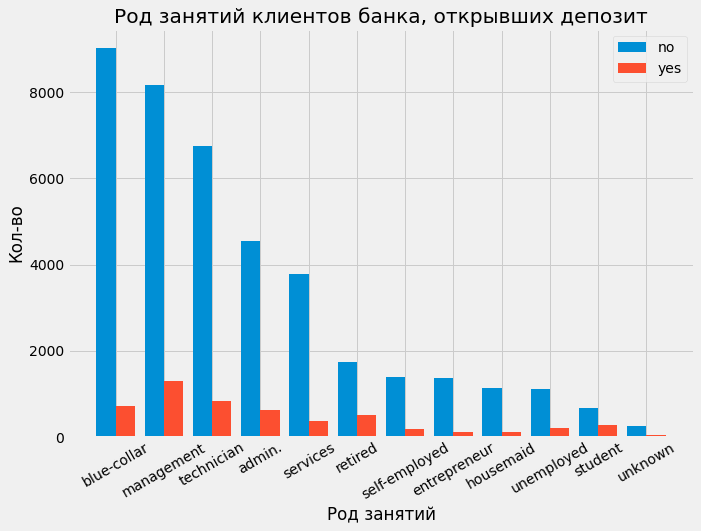

In [ ]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(10, 7))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30)  # добавляем метки делений

plt.show()

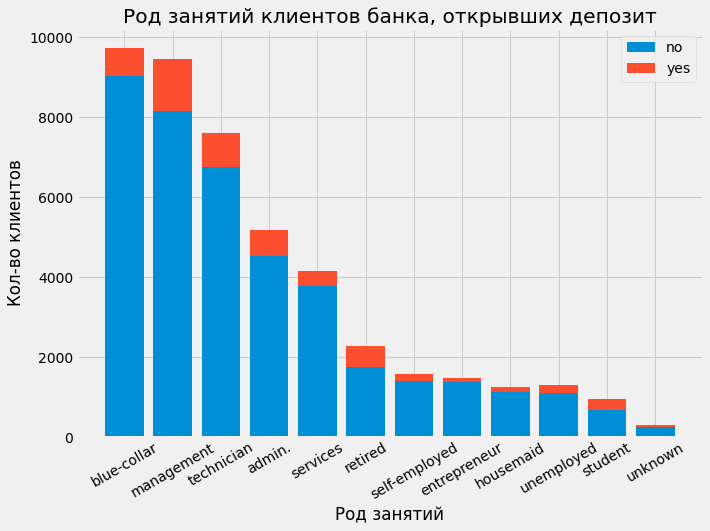

In [ ]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(10, 7))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30)

plt.show()

In [ ]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['y'], normalize='index').reset_index().sort_values(by='no', ascending=False)
data.head()

y,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


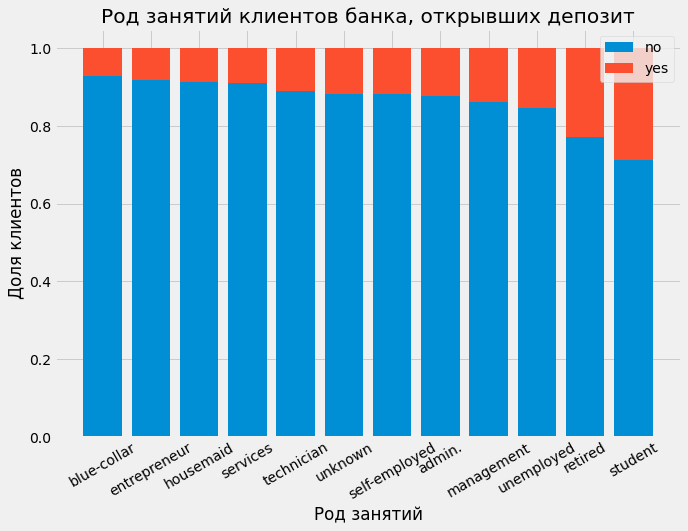

In [ ]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(10, 7))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30)

plt.show()

In [ ]:
# Готовим данные для графика
data = df['y'].value_counts()
data.head()

no     39922
yes     5289
Name: y, dtype: int64

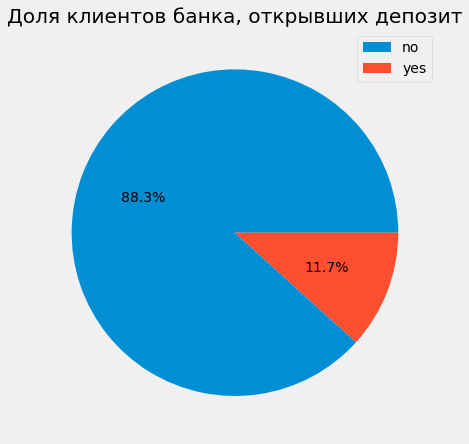

In [ ]:
# Строим круговую диаграмму

plt.figure(figsize=(10, 7))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index)

plt.show()

**План занятия**
* [EDA](#eda)
* [Загрузка данных](#load)
* [Уменьшение объема памяти, который занимает датасет](#reduce)
* [1. Распределение целевой переменной](#target)
* [2. Анализ признаков](#features)
    * [2.1 Количественные признаки](#num_features)
    * [2.2 Категориальные признаки](#cat_features)
    * [2.3 Бинарные признаки](#binary_features)
    * [2.4 Матрица корреляций](#corr)
* [3. Анализ зависимости таргета от фичей](#target_features)
    * [3.1 Количественные признаки](#num_features_target)
    * [3.2 Категориальные / бинарные признаки](#cat_bin_features)
    * [3.3 Гео данные](#geo)

**EDA** - Exploratory Data Analysis<a class='anchor' id='eda'>

_Kaggle House Prices: Advanced Regression Techniques competition:_

- Short EDA [beginner's tutorial](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
- Extended EDA [master's tutorial](https://www.kaggle.com/caicell/fun-python-eda-step-by-step) 

**Зачем это?**
- Понимание, как устроены данные
- Проверка фичей на адекватность
- _Генерация новых фич_ - наибольший вклад в качество прогноза

**3 шага EDA в Data Science**
1. Распределение таргета
2. Распределение фичей
3. Графики влияния фичей на таргет

**Подключение библиотек и скриптов**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

**Пути к директориям и файлам**

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1rWTMZFqBAYbrfUdM41k2MomXMzpfzfJH' -O housing.csv

--2021-11-10 11:05:37--  https://drive.google.com/uc?export=download&id=1rWTMZFqBAYbrfUdM41k2MomXMzpfzfJH
Resolving drive.google.com (drive.google.com)... 173.194.79.139, 173.194.79.100, 173.194.79.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ncmh2cmcmls9uullccivl7nlk0ct9ks4/1636542300000/14904333240138417226/*/1rWTMZFqBAYbrfUdM41k2MomXMzpfzfJH?e=download [following]
--2021-11-10 11:05:38--  https://doc-0g-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ncmh2cmcmls9uullccivl7nlk0ct9ks4/1636542300000/14904333240138417226/*/1rWTMZFqBAYbrfUdM41k2MomXMzpfzfJH?e=download
Resolving doc-0g-c0-docs.googleusercontent.com (doc-0g-c0-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to doc-0g-c0-docs.googleusercontent.com (doc-0

In [ ]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

### Загрузка данных<a class='anchor' id='load'>

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [ ]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


# 1. Распределение целевой переменной<a class='anchor' id='target'>

- Помните про различие среднего арифметическое, медианы, моды
- Среднее арифметическое (мат ожидание) подходят для нормальных распределений = SUM / N
- Медиана (quantile 50%) - практически для любых распределений = Середина отранжированного ряда
- Мода - для категориальных переменных = наиболее часто встречающееся значение в выборке

In [ ]:
{'red', 'green', 'blue'} - дискретный признак ('red', 'green', 'blue', 'red', 'green', 'red')
[0, 100] - вещественный признак (0, 5, 5.6, 10.5, 10.5)

[0, 0, 0, 0, 0, 3, 4, 8, 9, 9]
median - 1.5
mean - 3.3
mode - 0


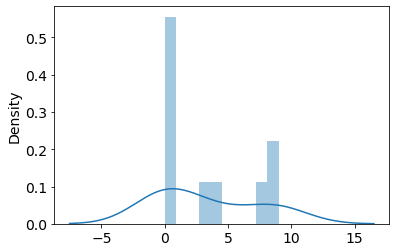

In [ ]:
x = np.random.randint(0, 10, 10)
print(sorted(x))
print(f'median - {np.quantile(x, q=0.5)}\nmean - {np.mean(x)}\nmode - {stats.mode(x)[0][0]}')
sns.distplot(x, bins=10);

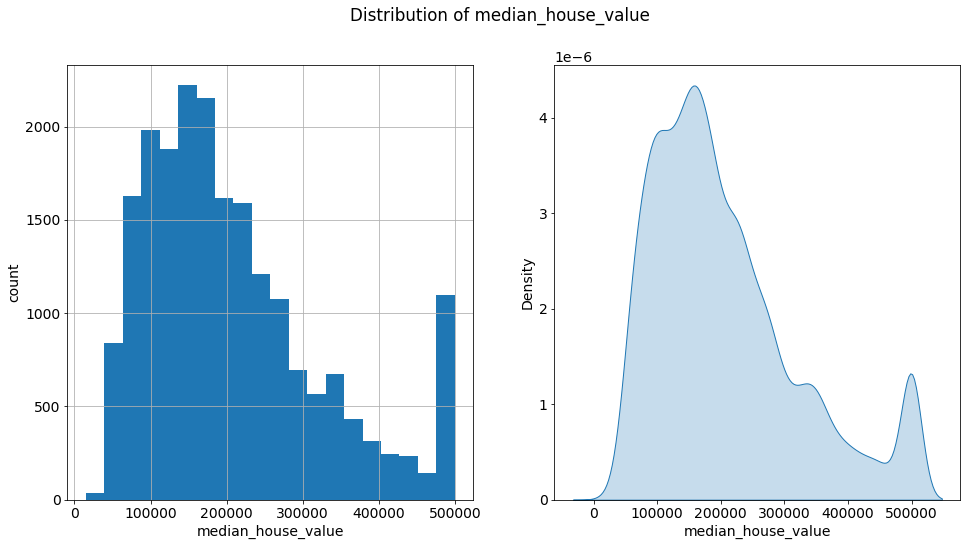

In [ ]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['median_house_value'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade=True, legend=False)
plt.xlabel('median_house_value')

plt.suptitle('Distribution of median_house_value')
plt.show()

In [ ]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

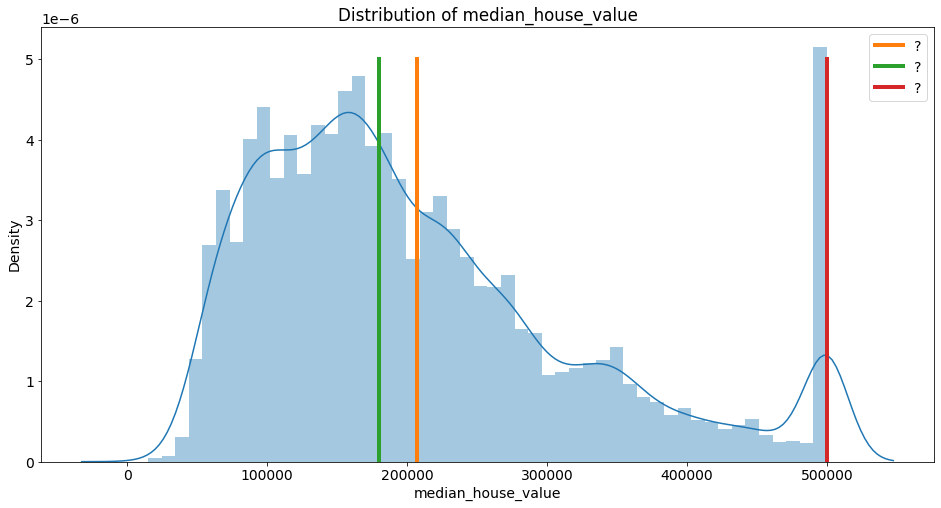

In [ ]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='?',  linewidth=4)
plt.plot([target_median] * 10, y, label='?',  linewidth=4)
plt.plot([target_mode] * 10, y, label='?', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

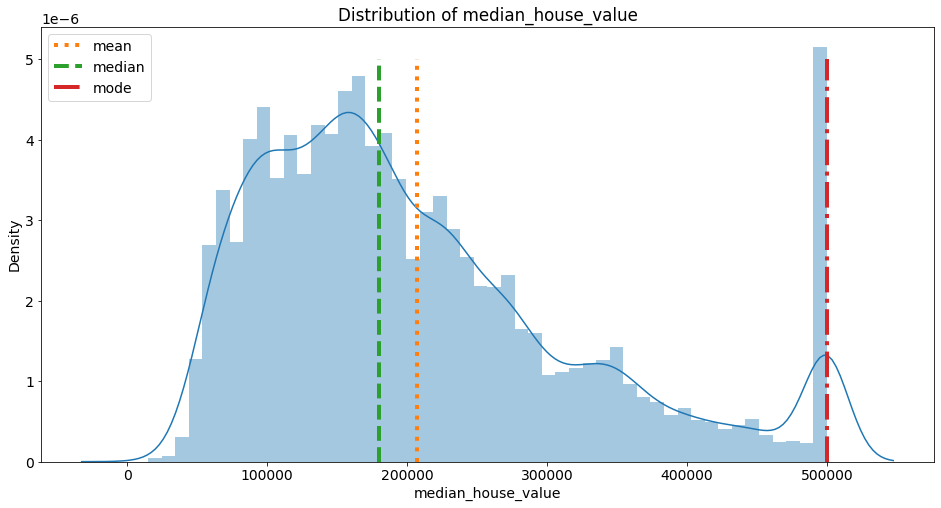

In [ ]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

In [ ]:
target_bins = df['median_house_value'] // 10000 * 10000
# 0 - 10000 --> 0
# 10001 - 20000 --> 1
# ...

target_adjusted_mode = target_bins.mode()[0]

target_adjusted_mode

160000.0

In [ ]:
df['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
303200.0      1
307900.0      1
383200.0      1
360800.0      1
405500.0      1
Name: median_house_value, Length: 3842, dtype: int64

In [ ]:
target_bins

0        450000.0
1        350000.0
2        350000.0
3        340000.0
4        340000.0
           ...   
20635     70000.0
20636     70000.0
20637     90000.0
20638     80000.0
20639     80000.0
Name: median_house_value, Length: 20640, dtype: float64

In [ ]:
target_bins.value_counts().iloc[:10]

160000.0    1005
500000.0     992
150000.0     970
90000.0      920
180000.0     853
130000.0     850
110000.0     847
170000.0     807
140000.0     802
80000.0      768
Name: median_house_value, dtype: int64

In [ ]:
len(np.unique(target_bins))

50

In [ ]:
np.unique(target_bins)

array([ 10000.,  20000.,  30000.,  40000.,  50000.,  60000.,  70000.,
        80000.,  90000., 100000., 110000., 120000., 130000., 140000.,
       150000., 160000., 170000., 180000., 190000., 200000., 210000.,
       220000., 230000., 240000., 250000., 260000., 270000., 280000.,
       290000., 300000., 310000., 320000., 330000., 340000., 350000.,
       360000., 370000., 380000., 390000., 400000., 410000., 420000.,
       430000., 440000., 450000., 460000., 470000., 480000., 490000.,
       500000.])

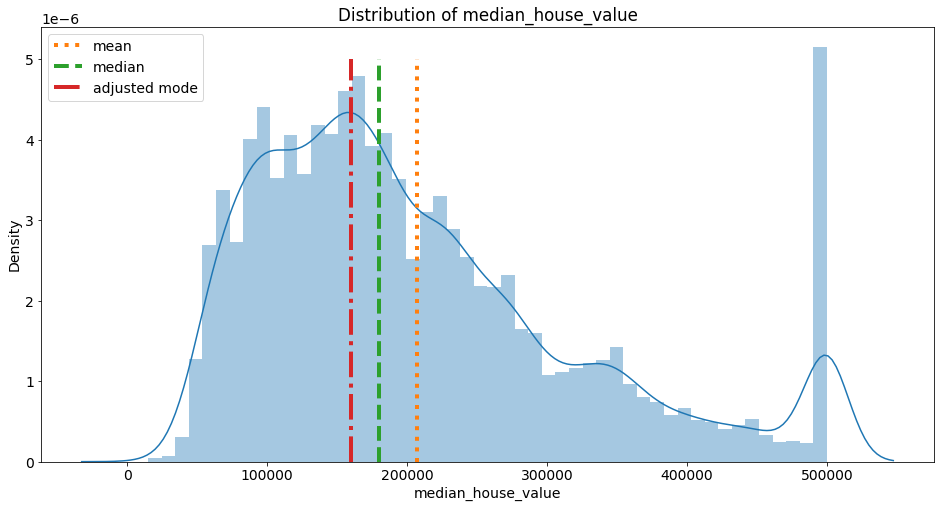

In [ ]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50) 

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_adjusted_mode] * 10, y, label='adjusted mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

Либо можем сразу выкинуть эти странные значения из выборки

In [ ]:
df['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
303200.0      1
307900.0      1
383200.0      1
360800.0      1
405500.0      1
Name: median_house_value, Length: 3842, dtype: int64

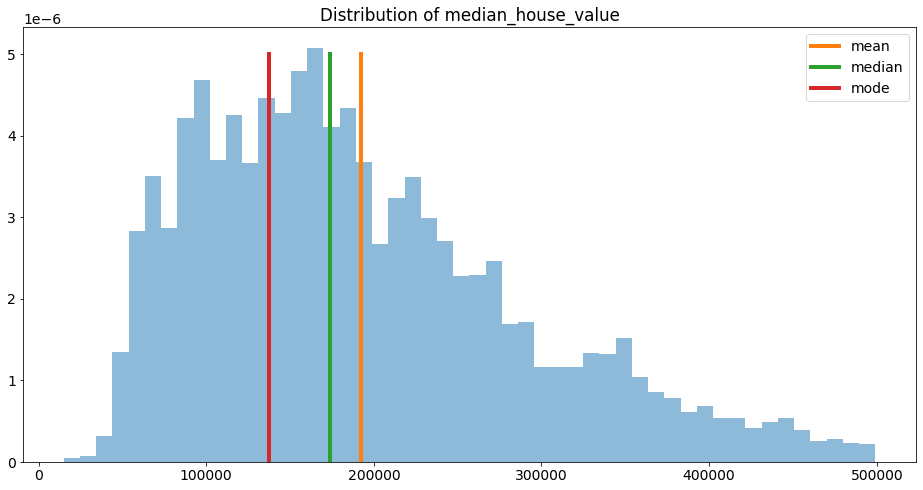

In [ ]:
df = df[df['median_house_value'] < 500000]

target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

plt.figure(figsize = (16, 8))
plt.hist(df['median_house_value'], density=True, bins=50, alpha=0.5)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='median', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

# 2. Анализ признаков<a class='anchor' id='features'>

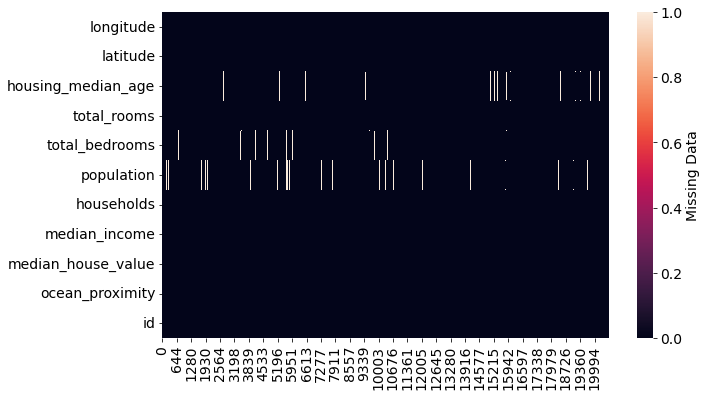

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cbar_kws={'label': 'Missing Data'});

### 2.1 Количественные признаки<a class='anchor' id='num_features'>

In [ ]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

In [ ]:
df_num_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


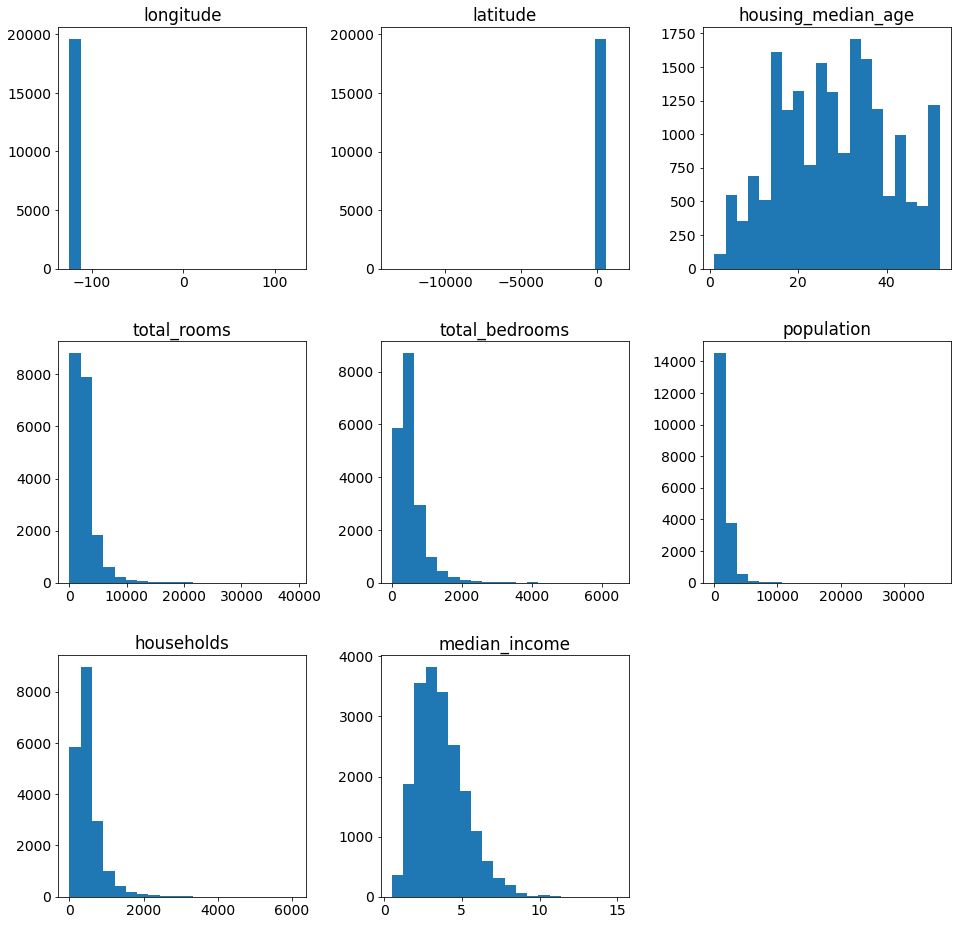

In [ ]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

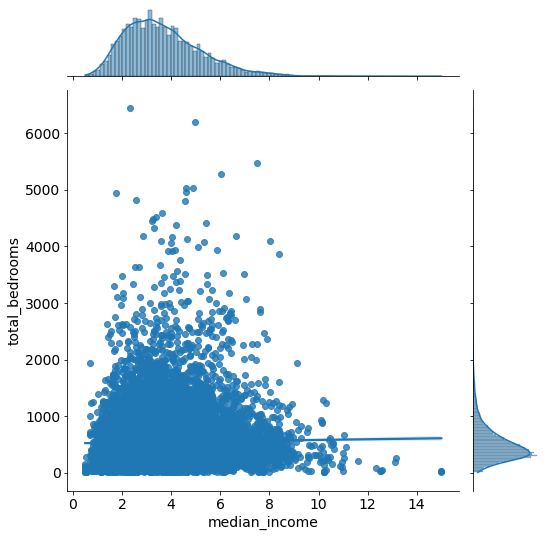

In [ ]:
grid = sns.jointplot(df['median_income'], df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

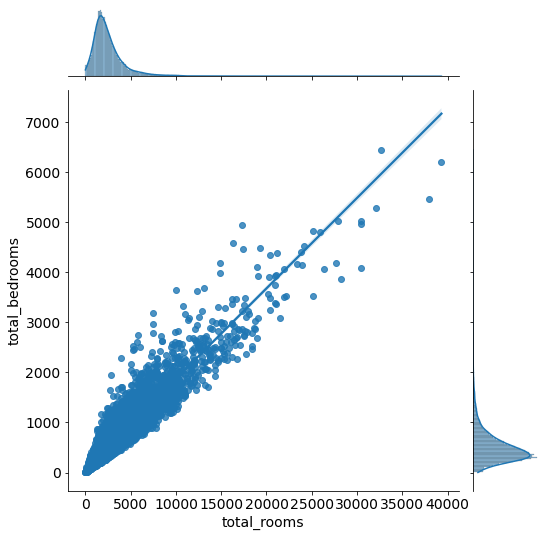

In [ ]:
grid = sns.jointplot(df['total_rooms'], df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

**Поиск выбросов с помощью box plot**

**Как строится box plot**  

[Подробное объяснение](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

**Как строятся "усы"** - вариантов масса
- среднее  +/-  3 сигма (стандартное отклонение)
- min / max
- median  +/-  1.5*(q75 - q25), 
- ...

*Интерквартильный размах = q75 - q25

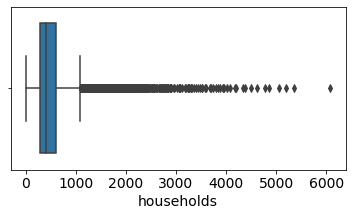

In [ ]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['households'], whis=1.5)

plt.xlabel('households')
plt.show()

In [ ]:
df.loc[df['households'] > 1000, 'households'] = df['households'].median()

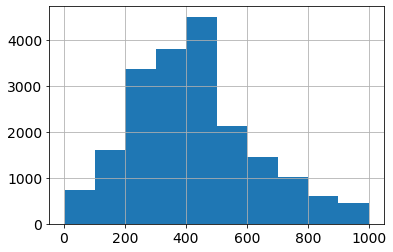

In [ ]:
df['households'].hist();

### 2.2 Категориальные признаки<a class='anchor' id='cat_features'>

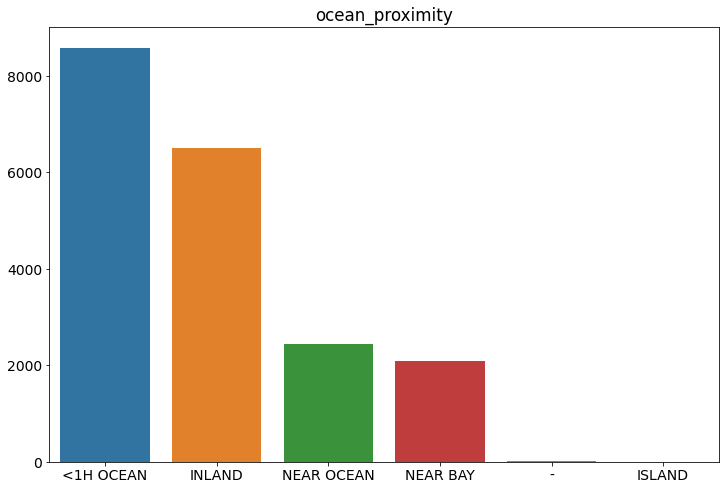

In [ ]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(12, 8))    
plt.title('ocean_proximity')
sns.barplot(counts.index, counts.values)
    
plt.show()

### 2.4 Матрица корреляций<a class='anchor' id='corr'>

- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Корреляция - мера только __линейной__ связи

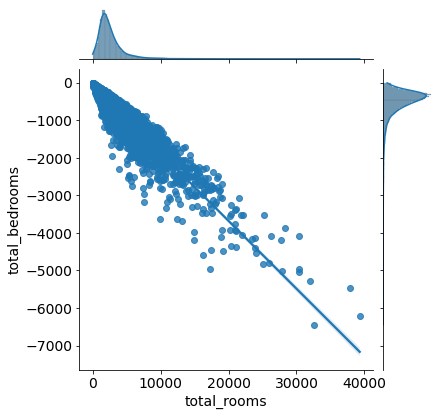

In [ ]:
grid = sns.jointplot(df['total_rooms'], -df['total_bedrooms'], kind='reg')
plt.show()

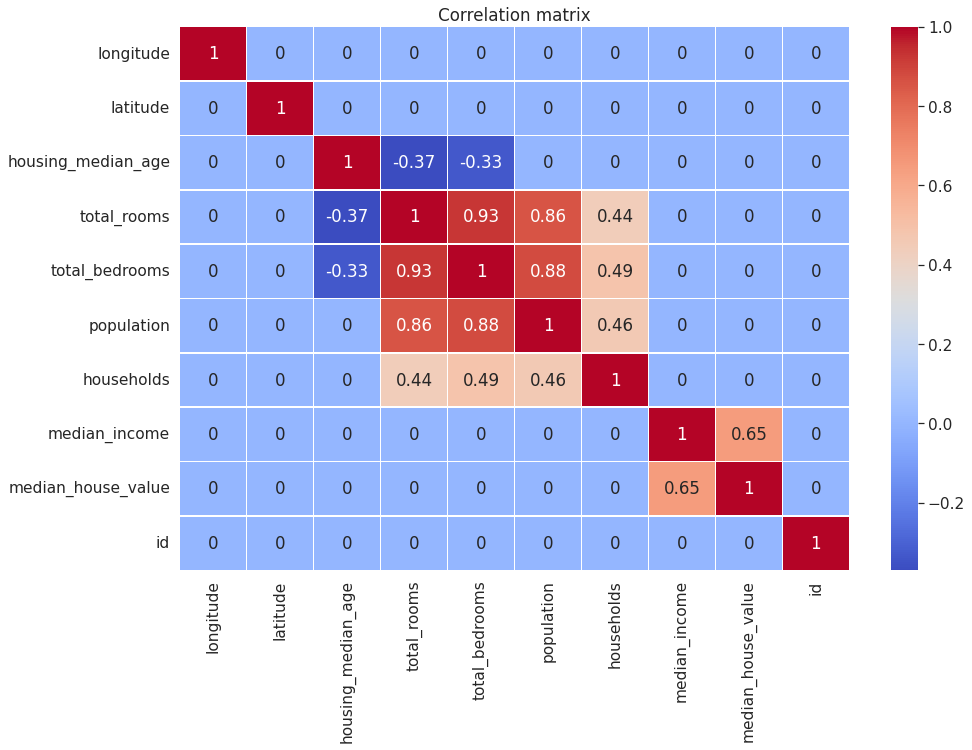

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

# 3. Анализ зависимости таргета от фичей<a class='anchor' id='target_features'>

## 3.1 Количественные признаки<a class='anchor' id='num_features_target'>

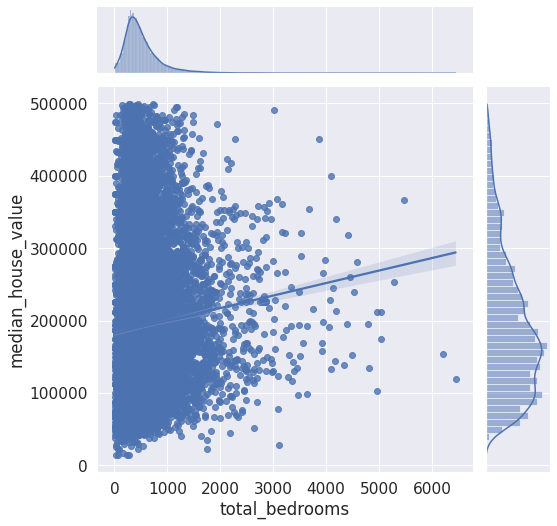

In [ ]:
grid = sns.jointplot(df['total_bedrooms'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

**longitude**

In [ ]:
df.loc[df['longitude'] >= 0, 'longitude'] = df['longitude'].median()

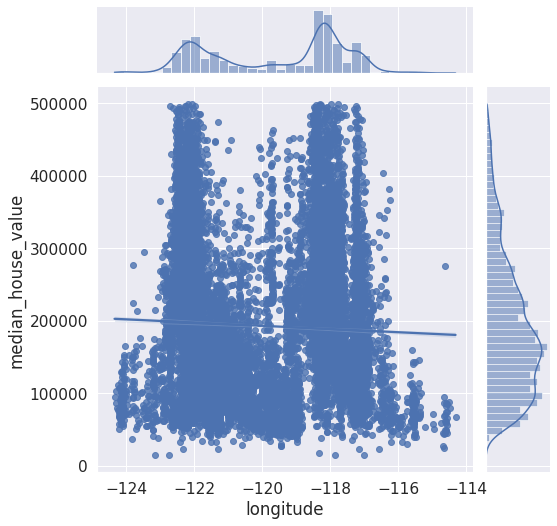

In [ ]:
grid = sns.jointplot(df['longitude'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

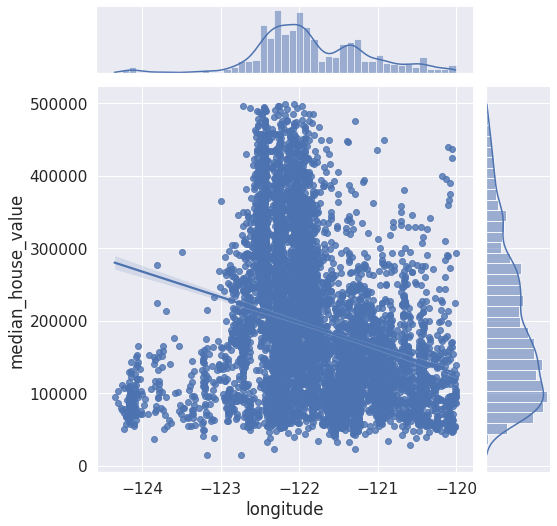

In [ ]:
df_cut = df[df['longitude'] < -120]
grid = sns.jointplot(df_cut['longitude'], df_cut['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

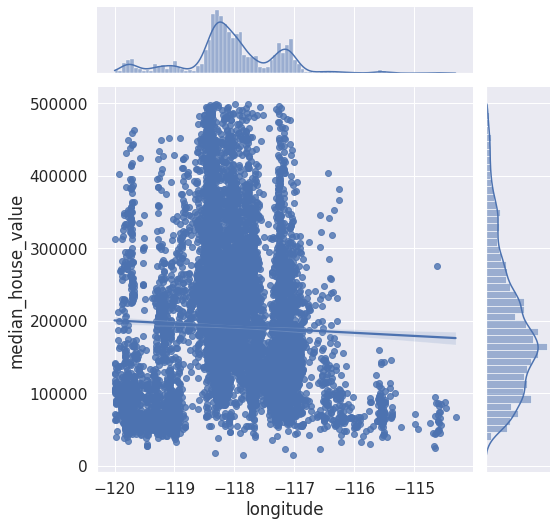

In [ ]:
df_cut = df[df['longitude'] >= -120]
grid = sns.jointplot(df_cut['longitude'], df_cut['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [ ]:
# Готовим данные
df['higher 150000'] = df['median_house_value'] > 150000
data = df[['higher 150000', 'median_income', 'population', 'total_rooms']]
data.head()

,higher 150000,median_income,population,total_rooms
0,True,8.3252,322.0,880.0
1,True,8.3014,2401.0,7099.0
2,True,7.2574,496.0,1467.0
3,True,5.6431,558.0,1274.0
4,True,3.8462,565.0,1627.0


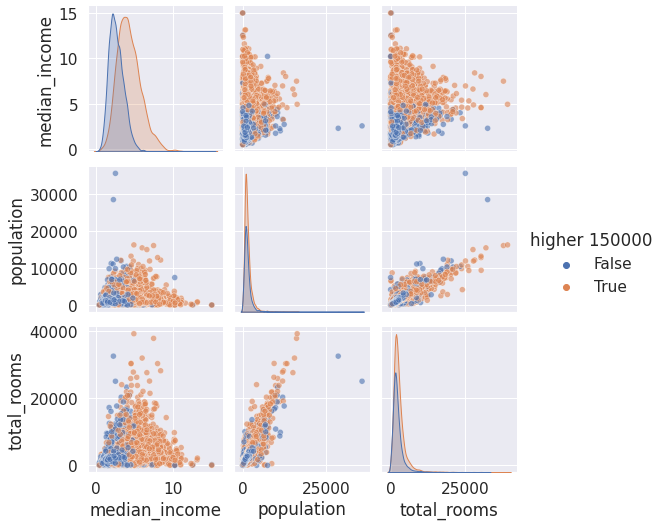

In [ ]:
sns.pairplot(data, hue='higher 150000', plot_kws={'alpha': 0.6});

## 3.2 Категориальные / бинарные признаки<a class='anchor' id='cat_bin_features'>

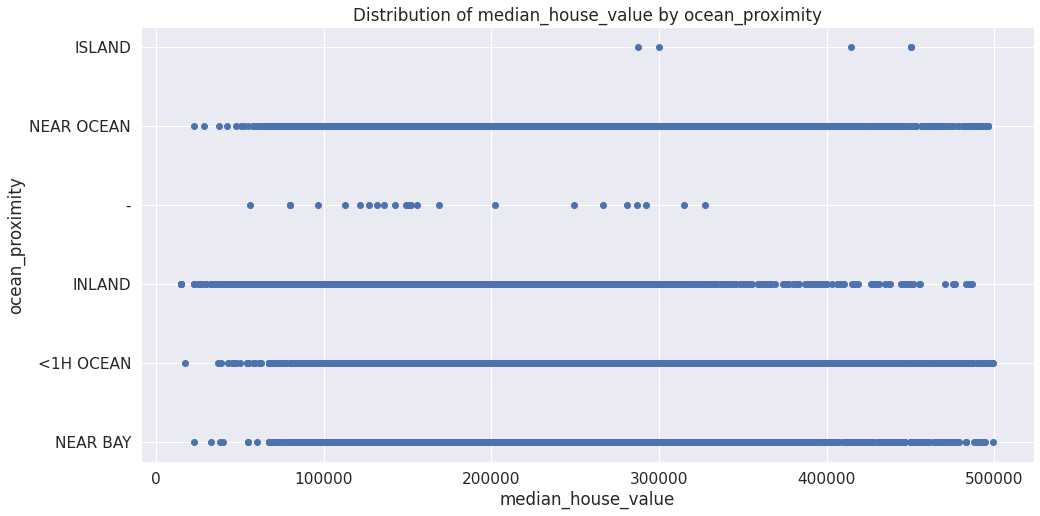

In [ ]:
plt.figure(figsize=(16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

### box plot

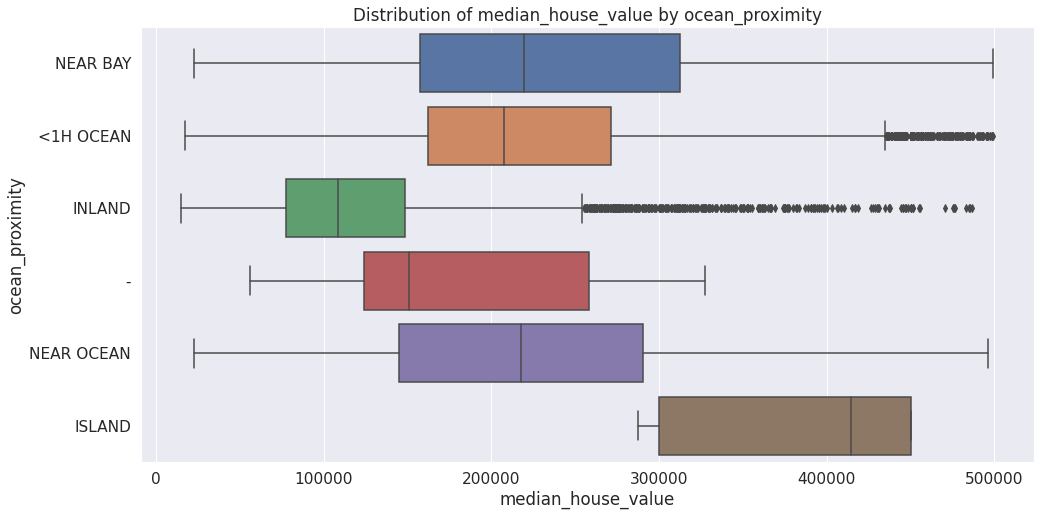

In [ ]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['median_house_value'], df['ocean_proximity'], whis=1.5)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

**Как строится box plot**  

[Подробное объяснение](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

**Как строятся "усы"** - вариантов масса
- среднее  +/-  3 сигма (стандартное отклонение)
- min / max
- median  +/-  1.5*(q75 - q25), 
- ...

*Интерквартильный размах = q75 - q25

### Violin plot

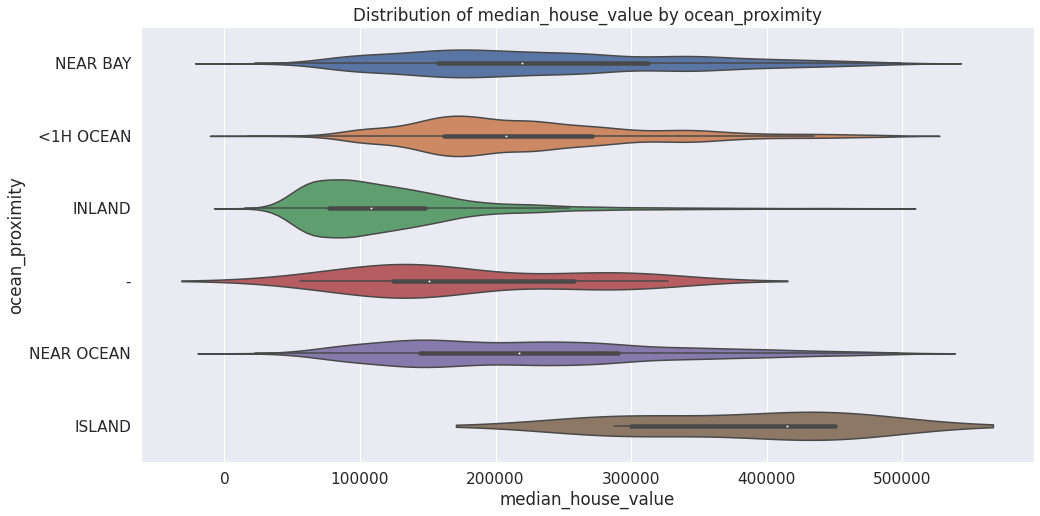

In [ ]:
plt.figure(figsize=(16, 8))

sns.violinplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

### Summary
1. Матрица корреляции
2. Знакомство с признаками
    - Плотность распределения (sns.distplot/sns.kdeplot/plt.hist - Узнать распределение признака)
    - sns.violinplot - Узнать распределение признака
    - Столбчатая диаграмма (sns.barplot/plt.bar - Узнать распределение категориального признака)
    - Ящик с усами (sns.boxplot/plt.boxplot - Узнать диапазон значений)
    - sns.jointplot - Взаимное изменение признаков
    - plt.pie - Изобразить долю объектов от всего кол-ва
3. Поиск выбросов
    - sns.distplot/sns.kdeplot/plt.hist - Искать хвосты слева и справа
    - sns.boxplot - Всё, что выходит за пределы усов - выбросы

Seaborn - https://seaborn.pydata.org/examples/index.html<br>
Matplotlib - https://matplotlib.org/3.1.0/gallery/index.html

# Новый раздел